<a href="https://colab.research.google.com/github/retnowulandaridwi89-lgtm/Tugas-Deep-Learning-Lanjut/blob/main/Tugas_DeepLearningLanjut_Pert11_Tugas_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS KELOMPOK DEEP LEARNING**


Sentimen Analisis

Anggota kelompok :

1.   Elsa Febiyanti
2.   Dwi Retno Wulandari



SETUP & INSTALL

In [ ]:
!pip install -q tensorflow pandas numpy scikit-learn matplotlib seaborn

print("✅ Dependencies installed!")
print("📦 TensorFlow version:", __import__('tensorflow').__version__)

✅ Dependencies installed!
📦 TensorFlow version: 2.19.0


IMPORT LIBRARIES

In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random

print("✅ All libraries imported successfully!")
print("🎯 TensorFlow version:", tf.__version__)
print("🔥 GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

✅ All libraries imported successfully!
🎯 TensorFlow version: 2.19.0
🔥 GPU Available: True


GENERATE DATA

In [ ]:

print("="*60)
print("GENERATING DATASET")
print("="*60)

def generate_positive_sentences(n=100):
    """Generate n kalimat positif"""
    base = [
        "Produk sangat berkualitas dan memuaskan",
        "Pelayanan ramah dan profesional",
        "Saya puas dengan pembelian ini",
        "Kualitas luar biasa sesuai ekspektasi",
        "Sangat direkomendasikan untuk dibeli",
        "Harga terjangkau kualitas premium",
        "Pengalaman berbelanja menyenangkan",
        "Staff membantu dan responsif",
        "Produk original berkualitas tinggi",
        "Pengiriman cepat packaging rapi",
    ]

    subjects = ["Produk", "Barang", "Kualitas", "Pelayanan", "Service"]
    adjectives = ["bagus", "memuaskan", "berkualitas", "premium", "excellent", "mantap", "juara", "terbaik"]
    modifiers = ["sekali", "banget", "sangat", "luar biasa", "recommended"]

    sentences = base * 10  # 10x10 = 100

    for i in range(len(sentences)):
        if i >= 10:  # Variasi mulai dari index 10
            subj = random.choice(subjects)
            adj = random.choice(adjectives)
            mod = random.choice(modifiers)
            sentences[i] = f"{subj} {adj} {mod}"

    return sentences[:n]

def generate_negative_sentences(n=100):
    """Generate n kalimat negatif"""
    base = [
        "Produk mengecewakan tidak sesuai",
        "Pelayanan buruk tidak responsif",
        "Sangat kecewa dengan pembelian",
        "Kualitas jelek tidak worth it",
        "Tidak direkomendasikan jangan beli",
        "Harga mahal kualitas murahan",
        "Pengalaman berbelanja buruk",
        "Staff tidak membantu tidak ramah",
        "Produk palsu kualitas rendah",
        "Pengiriman lama packaging rusak",
    ]

    subjects = ["Produk", "Barang", "Kualitas", "Pelayanan", "Service"]
    adjectives = ["buruk", "jelek", "mengecewakan", "murahan", "rusak", "payah", "tidak bagus"]
    modifiers = ["sekali", "banget", "sangat", "tidak recommended"]

    sentences = base * 10

    for i in range(len(sentences)):
        if i >= 10:
            subj = random.choice(subjects)
            adj = random.choice(adjectives)
            mod = random.choice(modifiers)
            sentences[i] = f"{subj} {adj} {mod}"

    return sentences[:n]

def generate_neutral_sentences(n=100):
    """Generate n kalimat netral"""
    base = [
        "Produk biasa saja tidak istimewa",
        "Pelayanan standar tidak spesial",
        "Produk sesuai dengan harga",
        "Kualitas cukup lumayan",
        "Bisa dipertimbangkan",
        "Harga wajar sesuai kualitas",
        "Pengalaman berbelanja standar",
        "Staff biasa saja",
        "Produk cukup oke",
        "Pengiriman normal",
    ]

    subjects = ["Produk", "Barang", "Kualitas", "Pelayanan", "Service"]
    adjectives = ["biasa", "standar", "cukup", "lumayan", "normal", "oke saja"]
    modifiers = ["saja", "tidak istimewa", "sesuai harga"]

    sentences = base * 10

    for i in range(len(sentences)):
        if i >= 10:
            subj = random.choice(subjects)
            adj = random.choice(adjectives)
            mod = random.choice(modifiers)
            sentences[i] = f"{subj} {adj} {mod}"

    return sentences[:n]

# Generate data
print("\n🔄 Generating sentences...")
positive_sentences = generate_positive_sentences(100)
negative_sentences = generate_negative_sentences(100)
neutral_sentences = generate_neutral_sentences(100)

print(f"✅ Positif: {len(positive_sentences)} sentences")
print(f"✅ Negatif: {len(negative_sentences)} sentences")
print(f"✅ Netral: {len(neutral_sentences)} sentences")

# Create training dataframe
df_train = pd.DataFrame({
    'text': positive_sentences + negative_sentences + neutral_sentences,
    'sentiment': ['positif']*100 + ['negatif']*100 + ['netral']*100
})

# Shuffle
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n📊 Training Data: {len(df_train)} rows")
print("\nSentiment Distribution:")
print(df_train['sentiment'].value_counts())

# Generate test data (400 rows)
all_sentences = positive_sentences + negative_sentences + neutral_sentences
test_sentences = [random.choice(all_sentences) for _ in range(400)]

df_test = pd.DataFrame({'text': test_sentences})

print(f"\n📊 Test Data: {len(df_test)} rows")

# Preview
print("\n🎯 Preview Training Data:")
print(df_train.head(10).to_string())

print("\n🎯 Preview Test Data:")
print(df_test.head(10).to_string())

GENERATING DATASET

🔄 Generating sentences...
✅ Positif: 100 sentences
✅ Negatif: 100 sentences
✅ Netral: 100 sentences

📊 Training Data: 300 rows

Sentiment Distribution:
sentiment
netral     100
negatif    100
positif    100
Name: count, dtype: int64

📊 Test Data: 400 rows

🎯 Preview Training Data:
                                text sentiment
0             Kualitas cukup lumayan    netral
1             Pelayanan lumayan saja    netral
2   Kualitas buruk tidak recommended   negatif
3    Pengiriman cepat packaging rapi   positif
4      Barang standar tidak istimewa    netral
5        Barang standar sesuai harga    netral
6              Kualitas rusak banget   negatif
7    Pengiriman lama packaging rusak   negatif
8  Harga terjangkau kualitas premium   positif
9   Kualitas jelek tidak recommended   negatif

🎯 Preview Test Data:
                            text
0         Pelayanan juara sekali
1            Kualitas cukup saja
2               Staff biasa saja
3    Produk memuaskan luar 

TEXT PREPROCESSING

In [ ]:

print("\n" + "="*60)
print("TEXT PREPROCESSING")
print("="*60)

def preprocess_text(text):
    """Preprocessing text"""
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply preprocessing
print("🔄 Preprocessing training data...")
df_train['text_clean'] = df_train['text'].apply(preprocess_text)

print("🔄 Preprocessing test data...")
df_test['text_clean'] = df_test['text'].apply(preprocess_text)

print("✅ Preprocessing complete!")

print("\n📝 Example:")
print(f"Original: {df_train['text'].iloc[0]}")
print(f"Cleaned:  {df_train['text_clean'].iloc[0]}")



TEXT PREPROCESSING
🔄 Preprocessing training data...
🔄 Preprocessing test data...
✅ Preprocessing complete!

📝 Example:
Original: Kualitas cukup lumayan
Cleaned:  kualitas cukup lumayan


TRANSFORMER MODEL

In [ ]:

print("\n" + "="*60)
print("BUILDING TRANSFORMER MODEL")
print("="*60)

class TransformerBlock(layers.Layer):
    """Transformer Block dengan Multi-Head Attention"""
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

class TokenAndPositionEmbedding(layers.Layer):
    """Embedding dengan positional encoding"""
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, inputs):
        maxlen = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        position_embeddings = self.pos_emb(positions)
        token_embeddings = self.token_emb(inputs)
        return token_embeddings + position_embeddings

def build_transformer_model(vocab_size, maxlen, embed_dim=128, num_heads=4,
                           ff_dim=128, num_transformer_blocks=2, num_classes=3, dropout_rate=0.2):
    """Build Transformer Model"""

    inputs = layers.Input(shape=(maxlen,))

    embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
    x = embedding_layer(inputs)

    for _ in range(num_transformer_blocks):
        transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)
        x = transformer_block(x)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

# Hyperparameters
MAX_TOKENS = 10000
MAX_LEN = 100
EMBED_DIM = 128
NUM_HEADS = 4
FF_DIM = 128
NUM_TRANSFORMER_BLOCKS = 2
DROPOUT_RATE = 0.2
EPOCHS = 30  # Reduced for Colab
BATCH_SIZE = 32

print("✅ Model architecture defined!")
print(f"\n📊 Hyperparameters:")
print(f"   Vocabulary Size: {MAX_TOKENS}")
print(f"   Max Length: {MAX_LEN}")
print(f"   Embedding Dim: {EMBED_DIM}")
print(f"   Attention Heads: {NUM_HEADS}")
print(f"   Transformer Blocks: {NUM_TRANSFORMER_BLOCKS}")
print(f"   Epochs: {EPOCHS}")
print(f"   Batch Size: {BATCH_SIZE}")


BUILDING TRANSFORMER MODEL
✅ Model architecture defined!

📊 Hyperparameters:
   Vocabulary Size: 10000
   Max Length: 100
   Embedding Dim: 128
   Attention Heads: 4
   Transformer Blocks: 2
   Epochs: 30
   Batch Size: 32


PREPARE DATA

In [ ]:

print("\n" + "="*60)
print("PREPARING DATA FOR TRAINING")
print("="*60)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['sentiment'])
y_train = keras.utils.to_categorical(y_train_encoded, num_classes=3)

print(f"✅ Labels encoded: {label_encoder.classes_}")

# Vectorization
vectorizer = layers.TextVectorization(
    max_tokens=MAX_TOKENS,
    output_mode='int',
    output_sequence_length=MAX_LEN
)

# Adapt on training data
vectorizer.adapt(df_train['text_clean'].values)

print(f"✅ Vectorizer adapted on {len(df_train)} samples")

# Transform - CONVERT TO NUMPY ARRAY untuk kompatibilitas dengan sklearn
print("🔄 Vectorizing text data...")
X_train_full = vectorizer(df_train['text_clean'].values)
X_train_full = X_train_full.numpy()  # ⭐ CONVERT TO NUMPY - INI YANG PENTING!

X_test = vectorizer(df_test['text_clean'].values)
X_test = X_test.numpy()  # ⭐ CONVERT TO NUMPY

print(f"✅ Text vectorized to numpy arrays")

# Train/val split - SEKARANG BISA KARENA SUDAH NUMPY ARRAY
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_full, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train_encoded
)

print(f"\n📊 Data Split:")
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Validation: {X_val.shape[0]} samples")
print(f"   Test: {X_test.shape[0]} samples")


PREPARING DATA FOR TRAINING
✅ Labels encoded: ['negatif' 'netral' 'positif']
✅ Vectorizer adapted on 300 samples
🔄 Vectorizing text data...
✅ Text vectorized to numpy arrays

📊 Data Split:
   Training: 240 samples
   Validation: 60 samples
   Test: 400 samples


BUILD & COMPILE MODEL

In [ ]:

print("\n" + "="*60)
print("BUILDING MODEL")
print("="*60)

model = build_transformer_model(
    vocab_size=MAX_TOKENS,
    maxlen=MAX_LEN,
    embed_dim=EMBED_DIM,
    num_heads=NUM_HEADS,
    ff_dim=FF_DIM,
    num_transformer_blocks=NUM_TRANSFORMER_BLOCKS,
    num_classes=3,
    dropout_rate=DROPOUT_RATE
)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model compiled!")
print(f"\n📊 Model Summary:")
model.summary()

print(f"\n🔢 Total Parameters: {model.count_params():,}")

# ==========================
# CELL 8: TRAIN MODEL
# ==========================

print("\n" + "="*60)
print("TRAINING MODEL")
print("="*60)

# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# Training
print(f"🚀 Starting training for {EPOCHS} epochs...")
print(f"⏱️  This may take 10-20 minutes with GPU, 20-30 minutes with CPU...")

history = model.fit(
    X_train, y_train_split,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

print("\n✅ Training complete!")


BUILDING MODEL
✅ Model compiled!

📊 Model Summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ token_and_position_embedding    │ (None, 100, 128)       │     1,292,800 │
│ (TokenAndPositionEmbedding)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 100, 128)       │       297,344 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ (None, 100, 128)       │       297,344 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,897,923 (7.24 MB)

 Trainable params: 1,897,923 (7.24 MB)

 Non-trainable params: 0 (0.00 B)


🔢 Total Parameters: 1,897,923

TRAINING MODEL
🚀 Starting training for 30 epochs...
⏱️  This may take 10-20 minutes with GPU, 20-30 minutes with CPU...
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3515 - loss: 1.2747 - val_accuracy: 0.3333 - val_loss: 1.1051 - learning_rate: 0.0010
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3550 - loss: 1.1395 - val_accuracy: 0.3333 - val_loss: 1.1111 - learning_rate: 0.0010
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3768 - loss: 1.1297 - val_accuracy: 0.3333 - val_loss: 1.0988 - learning_rate: 0.0010
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3921 - loss: 1.1015 - val_accuracy: 0.3333 - val_loss: 1.0987 - learning_rate: 0.0010
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4151 - loss: 1.0980 - val_accuracy: 0.3333 - val_loss: 1.1026 - learning_rate: 0.0010
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3327 - loss: 1.1248 - val_accuracy: 0.333

 VISUALIZE TRAINING


VISUALIZING TRAINING HISTORY


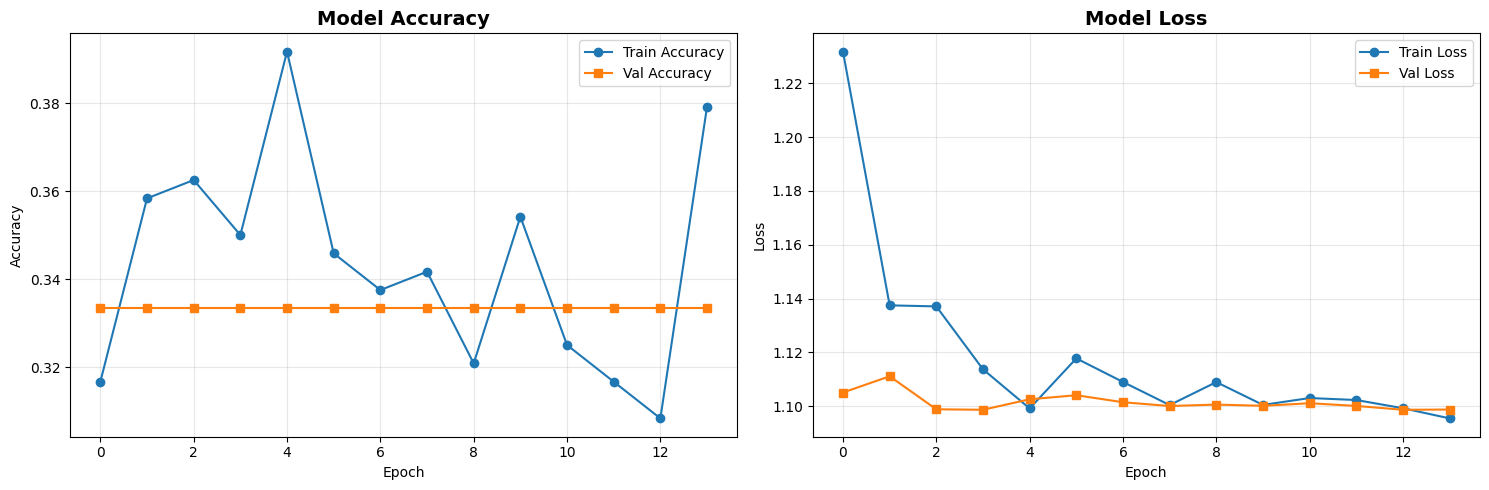


📊 Final Training Metrics:
   Train Accuracy: 0.3792
   Val Accuracy: 0.3333
   Train Loss: 1.0955
   Val Loss: 1.0987


In [ ]:

print("\n" + "="*60)
print("VISUALIZING TRAINING HISTORY")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Train Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Val Loss', marker='s')
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n📊 Final Training Metrics:")
print(f"   Train Accuracy: {final_train_acc:.4f}")
print(f"   Val Accuracy: {final_val_acc:.4f}")
print(f"   Train Loss: {final_train_loss:.4f}")
print(f"   Val Loss: {final_val_loss:.4f}")

MAKE PREDICTIONS

In [ ]:

print("\n" + "="*60)
print("MAKING PREDICTIONS ON TEST DATA")
print("="*60)

print("🔮 Predicting 400 test samples...")
predictions = model.predict(X_test, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_classes)
confidence_scores = np.max(predictions, axis=1)

# Add to dataframe
df_test['predicted_sentiment'] = predicted_labels
df_test['confidence'] = confidence_scores

print("✅ Predictions complete!")

print(f"\n📊 Prediction Distribution:")
print(df_test['predicted_sentiment'].value_counts())

print(f"\n🎯 Confidence Statistics:")
print(f"   Mean: {confidence_scores.mean():.4f}")
print(f"   Median: {np.median(confidence_scores):.4f}")
print(f"   Min: {confidence_scores.min():.4f}")
print(f"   Max: {confidence_scores.max():.4f}")


MAKING PREDICTIONS ON TEST DATA
🔮 Predicting 400 test samples...
✅ Predictions complete!

📊 Prediction Distribution:
predicted_sentiment
negatif    400
Name: count, dtype: int64

🎯 Confidence Statistics:
   Mean: 0.3394
   Median: 0.3394
   Min: 0.3390
   Max: 0.3398


DISPLAY RESULTS


SAMPLE PREDICTIONS
                                text predicted_sentiment  confidence
0             Pelayanan juara sekali             negatif    0.339270
1                Kualitas cukup saja             negatif    0.339382
2                   Staff biasa saja             negatif    0.339271
3        Produk memuaskan luar biasa             negatif    0.339385
4          Kualitas memuaskan banget             negatif    0.339597
5               Produk oke saja saja             negatif    0.339332
6             Pelayanan payah banget             negatif    0.339487
7         Pelayanan excellent sangat             negatif    0.339334
8      Pelayanan normal sesuai harga             negatif    0.339048
9               Pelayanan biasa saja             negatif    0.339228
10       Barang biasa tidak istimewa             negatif    0.339409
11         Produk mantap recommended             negatif    0.339517
12   Service payah tidak recommended             negatif    0.339590
13       Kuali

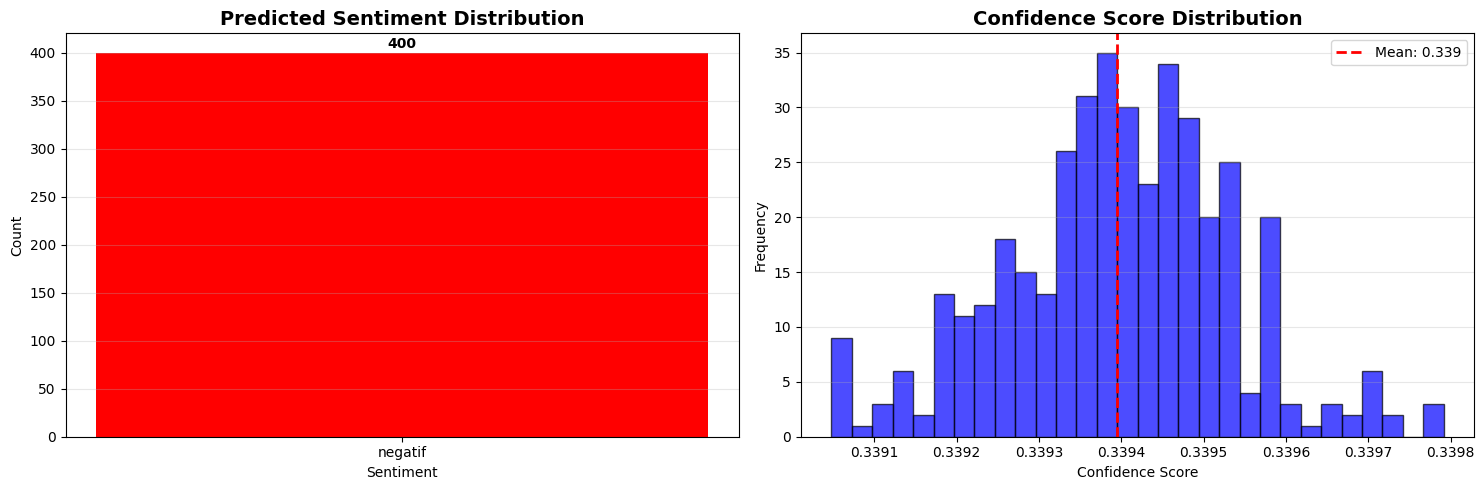


SAVING RESULTS
✅ Model saved: sentiment_transformer_model.h5
✅ Predictions saved: predictions.csv
✅ Training data saved: data_pelatihan.csv
✅ Test data (original) saved: data_pengujian.csv

📁 Files created in Colab:
   1. sentiment_transformer_model.h5 (~5-10 MB)
   2. predictions.csv (with predictions & confidence)
   3. data_pelatihan.csv (training data)
   4. data_pengujian.csv (original test data without labels)


In [ ]:

print("\n" + "="*60)
print("SAMPLE PREDICTIONS")
print("="*60)

# Display sample predictions
sample_df = df_test[['text', 'predicted_sentiment', 'confidence']].head(20)
print(sample_df.to_string())

# Visualize prediction distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sentiment distribution
sentiment_counts = df_test['predicted_sentiment'].value_counts()
colors = {'positif': 'green', 'negatif': 'red', 'netral': 'gray'}
bar_colors = [colors.get(label, 'blue') for label in sentiment_counts.index]

axes[0].bar(sentiment_counts.index, sentiment_counts.values, color=bar_colors)
axes[0].set_title('Predicted Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (label, count) in enumerate(sentiment_counts.items()):
    axes[0].text(i, count + 5, str(count), ha='center', fontweight='bold')

# Confidence distribution
axes[1].hist(confidence_scores, bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[1].set_title('Confidence Score Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Confidence Score')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axvline(confidence_scores.mean(), color='red', linestyle='--',
                linewidth=2, label=f'Mean: {confidence_scores.mean():.3f}')
axes[1].legend()

plt.tight_layout()
plt.show()


print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

# Save model
model.save('sentiment_transformer_model.h5')
print("✅ Model saved: sentiment_transformer_model.h5")

# Save predictions
df_test.to_csv('predictions.csv', index=False)
print("✅ Predictions saved: predictions.csv")

# Save training data
df_train.to_csv('data_pelatihan.csv', index=False)
print("✅ Training data saved: data_pelatihan.csv")

# Create a simple test CSV with original data
df_test_original = pd.DataFrame({'text': test_sentences})
df_test_original.to_csv('data_pengujian.csv', index=False)
print("✅ Test data (original) saved: data_pengujian.csv")

print("\n📁 Files created in Colab:")
print("   1. sentiment_transformer_model.h5 (~5-10 MB)")
print("   2. predictions.csv (with predictions & confidence)")
print("   3. data_pelatihan.csv (training data)")
print("   4. data_pengujian.csv (original test data without labels)")

DOWNLOAD FILES

In [ ]:

print("\n" + "="*60)
print("DOWNLOAD FILES")
print("="*60)

from google.colab import files

print("📥 Downloading files to your computer...")
print("(If download doesn't start, download manually from Files panel)")

try:
    # Try to download model (might be too large)
    print("\n1. Downloading model file...")
    files.download('sentiment_transformer_model.h5')
    print("   ✅ Downloaded: sentiment_transformer_model.h5")
except Exception as e:
    print(f"   ⚠️  Model file too large or error: {e}")
    print("   💡 Download manually: Click Files icon (left) → Right-click file → Download")

try:
    print("\n2. Downloading predictions...")
    files.download('predictions.csv')
    print("   ✅ Downloaded: predictions.csv")
except Exception as e:
    print(f"   ⚠️  Error: {e}")

try:
    print("\n3. Downloading training data...")
    files.download('data_pelatihan.csv')
    print("   ✅ Downloaded: data_pelatihan.csv")
except Exception as e:
    print(f"   ⚠️  Error: {e}")

try:
    print("\n4. Downloading test data...")
    files.download('data_pengujian.csv')
    print("   ✅ Downloaded: data_pengujian.csv")
except Exception as e:
    print(f"   ⚠️  Error: {e}")

print("\n✅ Download complete!")
print("\n💡 Alternative: Use Files panel (left sidebar) to download manually")



DOWNLOAD FILES
📥 Downloading files to your computer...
(If download doesn't start, download manually from Files panel)

1. Downloading model file...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: sentiment_transformer_model.h5

2. Downloading predictions...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: predictions.csv

3. Downloading training data...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: data_pelatihan.csv

4. Downloading test data...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: data_pengujian.csv

✅ Download complete!

💡 Alternative: Use Files panel (left sidebar) to download manually
